# 공간 필터링
---
- 영상 처리중에서 가장 기본적인 처리로써 인접 화소들의 값을 참조하여 화소의 값을 변경하는 처리이다.  

왜 "공간 처리"라고 할까?  

이는 "주파수 영역"과 차이를 두기 위함이라 한다.  

선형 비선형 처리를 다 한다.   

기본적으로 주변의 점을 써서 선형 연산을 하는 선형 필터링이다.  
비선형필터를 쓴다고 하는 말은 주변에 있는 점을 쓰는데 비선형 연산을 쓴다는 것.  
예를 들어 소팅해서 가운데 값을 쓰거나 몇개 뽑아서 쓰는 경우  

- 인접 화소들의 값을 참조하여 화소의 값을 변경하는 처리  
     그럼 문제가 어디까지가 내 이웃인가이다. 기본적으로 특별히 언급을 하지 않는다면 바로 옆의 픽셀을 말한다.  


## 평균값 필터링

주변부를 다 더한후 평균을 취한다.  

-> 블러링 되는 효과를 가진다.  
평균이란 독특한 값을 없애주는 것을 의미하기 때문에 스무딩해진다.  



In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = [10, 5]


def imshow(tit, images):
    plt.title(tit)
    if len(images.shape) == 3:
        plt.imshow(cv2.cvtColor(images, cv2.COLOR_BGR2RGB))
    else:
        plt.imshow(images, cmap='gray')
    plt.show()

In [3]:
src = cv2.imread('img/Lenna.png', 0)

dst = np.zeros(src.shape, dtype=np.uint8) # 타입을 준 이유는 넘파이는 기본적으로 float

for r in range(1, src.shape[0]-1):
    for c in range(1, src.shape[1]-1):
#         sum = (src[r, c-1] + src[r, c]rc[r, c+1]) / 3 # 오버플로 발생
        sum = (int(src[r, c-1]) + int(src[r, c]) + int(src[r, c+1])) / 3 # 
        dst[r,c] = np.uint8(sum)
imshow("", dst)

AttributeError: 'NoneType' object has no attribute 'shape'

오버플로우가 발생한다.  




In [6]:
(4 + 200 + 100) / 4 # 각 원소가 int형태이지만

76.0

위 사진은 모션블러를 일으키는 것으로 좌우 값들만 평균을 내서 사용하는 것

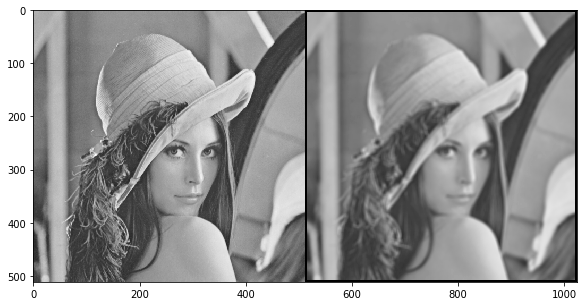

In [18]:
src = cv2.imread('img/Lenna.png', 0)

dst = np.zeros(src.shape, dtype=np.uint8)  # 타입을 준 이유는 넘파이는 기본적으로 float

for r in range(3, src.shape[0] - 3):
    for c in range(3, src.shape[1] - 3):
        sum = 0
        for r1 in range(-3, 4):
            for c1 in range(-3, 4):
                sum += src[r + r1, c + c1]

        dst[r, c] = sum / 49
imshow("", np.hstack((src, dst)))

점점 많은 점을 참고할 수록 고주파 성분이 없어진다. 

연산이 많기 때문에 point연산보다 속도가 훨씬 느리다.  


이것을 __모션블러__    형태로 변경하려면 어떻게 해야될까?

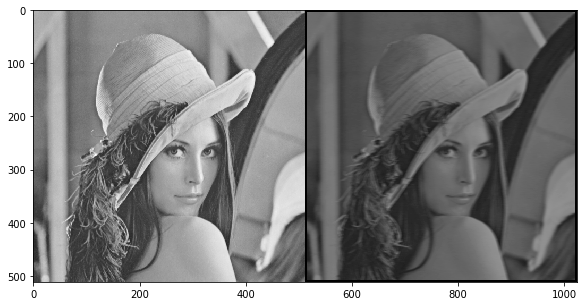

In [19]:
src = cv2.imread('img/Lenna.png', 0)

dst = np.zeros(src.shape, dtype=np.uint8)  # 타입을 준 이유는 넘파이는 기본적으로 float

for r in range(3, src.shape[0] - 3):
    for c in range(3, src.shape[1] - 3):
        sum = 0
        for c1 in range(-3, 4):
            sum += src[r, c + c1]

        dst[r, c] = sum / 11
imshow("", np.hstack((src, dst)))

뺄셈을 하게 되면 어떤 의미를 가질까?  

오른쪽에 있는 픽셀을 빼게 되면 당연히 음수가 나올 수 있다.  
그래서 범위가 -255 ~ 255로 변하게 된다.  

뺀다는 것은 difference를 알고 싶은 것임으로 절대값을 구해준다.  

엣지를 볼때는 이미지의 정상크기 파일로 보아야 된다.  

결과를 통해서 

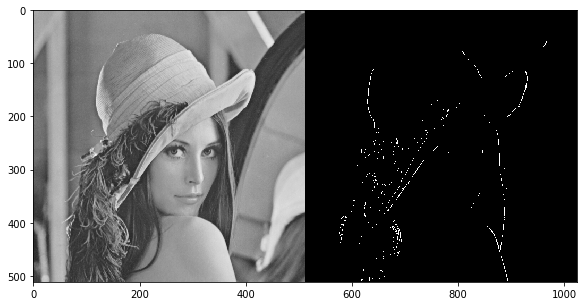

In [2]:
src = cv2.imread('img/Lenna.png', 0)

dst = np.zeros(src.shape, dtype=np.uint8)  # 타입을 준 이유는 넘파이는 기본적으로 float

for r in range(1, src.shape[0] - 1):
    for c in range(1, src.shape[1] - 1):
        out = np.abs(int(src[r, c]) - src[r, c + 1])
        dst[r, c] = out
dst = (dst > 50) * 255
dst = dst.astype('uint8')
imshow("", np.hstack((src, dst)))
cv2.imshow("", dst)
cv2.waitKey()
cv2.destroyAllWindows()

레나 사진을 봤을 때는 가장자리 전부 나오는 줄 알았지만  

box.png를 통해서 수평 가장자리는 검출이 되지 않는 걸 보았다.  
그래서 박스는 수직 대각선만, 삼각형은 밑만 원은 거의 다 검출이 되었다.  

엣지연산을 통해서 대각선의 외형을 뽑아낼 수 있다. 


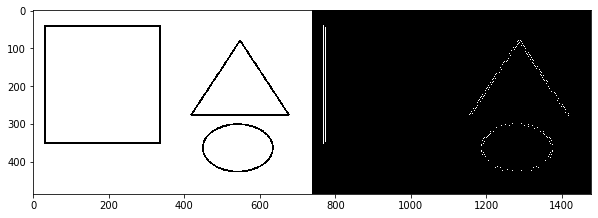

In [5]:
src = cv2.imread('img/Lenna.png', 0)

dst = np.zeros(src.shape, dtype=np.uint8)  # 타입을 준 이유는 넘파이는 기본적으로 float

for r in range(1, src.shape[0] - 1):
    for c in range(1, src.shape[1] - 1):
        out = np.abs(int(src[r, c]) - src[r, c + 1])
        dst[r, c] = out
dst = (dst > 50) * 255
dst = dst.astype('uint8')
imshow("", np.hstack((src, dst)))
cv2.imshow("", dst)
cv2.waitKey()
cv2.destroyAllWindows()

위에있는 픽셀과 연산해보자  

수직선분이 검출되지 않는 것을 확인할 수 있다.  


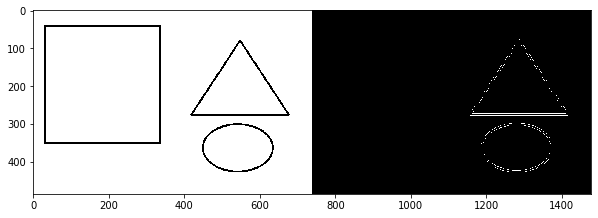

In [7]:
src = cv2.imread('img/box.png', 0)

dst = np.zeros(src.shape, dtype=np.uint8)  # 타입을 준 이유는 넘파이는 기본적으로 float

for r in range(1, src.shape[0] - 1):
    for c in range(1, src.shape[1] - 1):
        out = np.abs(int(src[r, c]) - src[r + 1, c])
        dst[r, c] = out
dst = (dst > 50) * 255
dst = dst.astype('uint8')
imshow("", np.hstack((src, dst)))
cv2.imshow("", dst)
cv2.waitKey()
cv2.destroyAllWindows()

전부 다 더해서 평균을 해주면 블러링,  
옆에있는 것을 빼주면 모션블러  


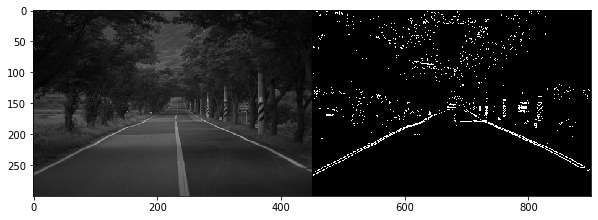

In [13]:
src = cv2.imread('img/road1.jpg', 0)

dst = np.zeros(src.shape, dtype=np.uint8)  # 타입을 준 이유는 넘파이는 기본적으로 float

for r in range(1, src.shape[0] - 1):
    for c in range(1, src.shape[1] - 1):
        out = np.abs(int(src[r, c]) - src[r + 1, c])
        dst[r, c] = out
dst = (dst > 20) * 255
dst = dst.astype('uint8')
imshow("", np.hstack((src, dst)))
cv2.imshow("", dst)
cv2.waitKey()
cv2.destroyAllWindows()

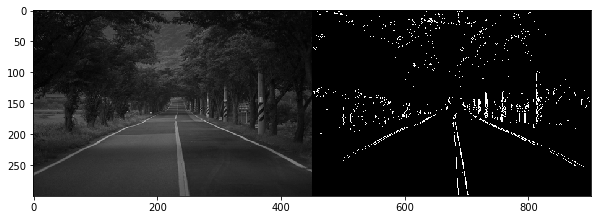

In [15]:
src = cv2.imread('img/road1.jpg', 0)

dst = np.zeros(src.shape, dtype=np.uint8)  # 타입을 준 이유는 넘파이는 기본적으로 float

for r in range(1, src.shape[0] - 1):
    for c in range(1, src.shape[1] - 1):
        out = np.abs(int(src[r, c]) - src[r, c + 1])
        dst[r, c] = out
dst = (dst > 20) * 255
dst = dst.astype('uint8')
imshow("", np.hstack((src, dst)))
cv2.imshow("", dst)
cv2.waitKey()
cv2.destroyAllWindows()

위아래 모두 합산해보았다.


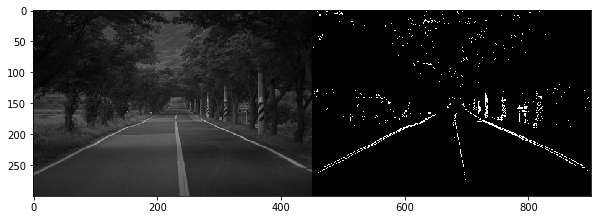

In [18]:
src = cv2.imread('img/road1.jpg', 0)

dst = np.zeros(src.shape, dtype=np.uint8)  # 타입을 준 이유는 넘파이는 기본적으로 float

for r in range(1, src.shape[0] - 1):
    for c in range(1, src.shape[1] - 1):
        out = np.abs(int(src[r, c]) - src[r + 1, c])

        out2 = np.abs(int(src[r, c]) - src[r, c + 1])

        dst[r, c] = (out + out2) / 2
dst = (dst > 20) * 255
dst = dst.astype('uint8')
imshow("", np.hstack((src, dst)))
cv2.imshow("", dst)
cv2.waitKey()
cv2.destroyAllWindows()

# 컨벌루션

- 컨벌루션은 중심 화소의 값을 인접 화소값들의 가중 합으로 대체하는 연산이다.

이전 예제인 평균값에서는 1/9의 가중치를 가졌다고 생각할 수 있다.  

행렬을 만들어 `filter2D `함수를 사용한다.  



In [19]:
mask = np.array([[1 / 9.0, 1 / 9.0, 1 / 9.0], [1 / 9.0, 1 / 9.0, 1 / 9.0],
                 [1 / 9.0, 1 / 9.0, 1 / 9.0]])

print(mask)

[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]


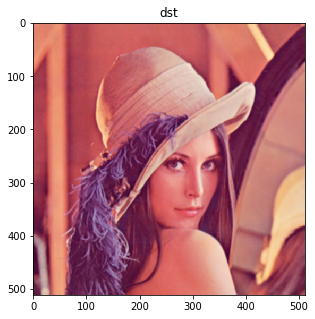

uint8


In [23]:
src = cv2.imread('img/Lenna.png')
dst = cv2.filter2D(src, -1 ,mask)
imshow('dst', dst)
print(dst.dtype)

원래 값을 연산하여 uint8  

기본적으로 padding이 되기 때문에 계산하지 못하는 쪽은 


`dst = cv2.convertScaleAbs(dst)`  
음수가 발생하지 않도록 절대값을 취해준다.  

이전에 float로 변경하여 uint8로 음수 값을 취하지 못하는 사이드 이펙트를 방지한다.  

In [33]:
mask = np.array([[0, 0, 0], [0, 1, -1], [0, 0, 0]])
print(mask)
src = cv2.imread('img/Lenna.png', 0)
src = src.astype('float')  # 사이드이펙트를 막을 수 있는 방법
print(src.dtype)

[[ 0  0  0]
 [ 0  1 -1]
 [ 0  0  0]]
float64


In [35]:
dst = cv2.filter2D(src, -1 ,mask)
print(dst.dtype)
dst

float64


array([[  0.,   1.,   1., ...,  13.,  24., -24.],
       [  0.,   1.,   1., ...,  13.,  24., -24.],
       [  0.,   1.,   1., ...,  13.,  24., -24.],
       ...,
       [  0.,  -6.,   0., ...,   3.,  -2.,   2.],
       [  0., -11.,   3., ...,  -1.,  -4.,   4.],
       [  0., -11.,   3., ...,  -1.,  -4.,   4.]])

음수로 되었던 픽셀값들에 대해 절대값이 취해진 것을 볼 수 있다.  

그리고 자료형 또한 uint8로 변경해준다.  



[[ 0  1  1 ... 13 24 24]
 [ 0  1  1 ... 13 24 24]
 [ 0  1  1 ... 13 24 24]
 ...
 [ 0  6  0 ...  3  2  2]
 [ 0 11  3 ...  1  4  4]
 [ 0 11  3 ...  1  4  4]]


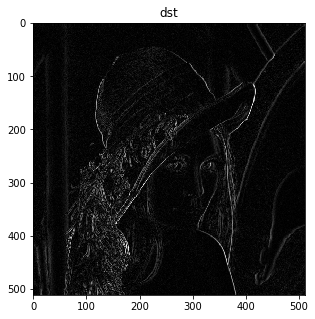

uint8


In [37]:
print(dst)
dst = cv2.convertScaleAbs(dst)  # 음수가 발생하지 않도록
imshow('dst', dst)
print(dst.dtype)

항상 타입에 신경을 써주는 것이 중요하다.  

### 가장자리 화소의 처리

상당히 가장자리를 처리해주는 것들이 많다.  

패딩을 0으로 채우거나, 패딩과 맞닿은 곳의 수로 채우거나, 등등 많다.  

이것은 `cv2.filter2D` 마지막에 넣어준다.  









### 평균값 필터링

`blur` 함수가 있다.  

노이즈를 처리할 때 사용한다.  




(256, 256, 3)


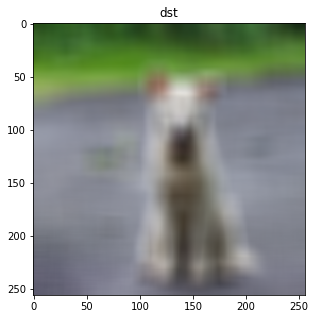

In [44]:
img = cv2.imread('img/dog.bmp')
print(img.shape)

dst = cv2.blur(img, (21,21))
imshow('dst', dst)

## 가우시안 필터링

가까이에 있는 것은 많이 반영하고 멀리있는 것은 가중치를 낮게 하는 것  

- 거리에 따라 가중치를 다르게 계산한다.

즉 계산을 통해 나올 수 있는 마스크.  

블러링 필터와 동급이며 계산 시간은 더 많이 걸린다.  
커널 크기가 더 커야한다. 정확도 측면에서는 가우시안 필터가 더 좋다.  

그래서 일반적으로 평균필터링보다는 가우시안 필터링을 사용한다.  



커널의 크기도 조절할 수 있지만 표준편차를 조절한다.  
표준편차를 크게할 경우 주변의 값을 많이 참조하고  작게할 경우 적게 참조한다.  

표준편차가 엄청 커지면 거의 평균 필터링이랑 비슷해지는 것이고,  
표준편차가 엄청 작아지면 거의 원본으로 갈 것이다.  

사용은 `cv2.GaussianBlur(src, (15, 15), sigma) `로 사용한다.


(256, 256, 3)


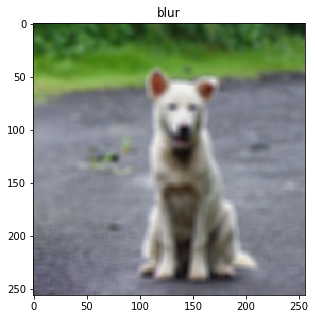

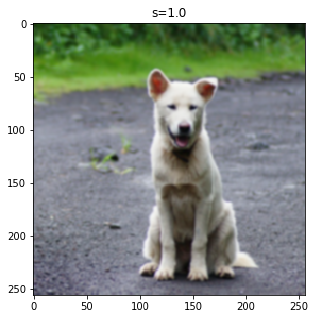

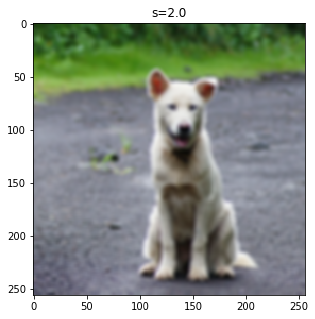

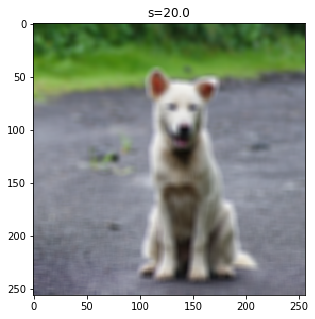

In [47]:
img = cv2.imread('img/dog.bmp')
print(img.shape)

dst = cv2.blur(img, (7, 7))
imshow('blur', dst)

dst2 = cv2.GaussianBlur(img, (7, 7), 1.0)
imshow('s=1.0', dst2)

dst3 = cv2.GaussianBlur(img, (7, 7), 2.0)
imshow('s=2.0', dst3)

dst4 = cv2.GaussianBlur(img, (7, 7), 20.0)
imshow('s=20.0', dst4)

동일 크기의 커널이라고 하더라도 분포에 따라서 차이를 볼 수 있다.  

차이를 확실하게 볼수있는 rose 사진으로 실습해보자.

In [4]:
img = cv2.imread('img/rose.bmp', 0)

sig = [1, 3, 20, 50, 90]
for s in sig:
    dst2 = cv2.GaussianBlur(img, (15, 15), s)
    cv2.imshow('sigma=' + str(s), dst2)
    cv2.waitKey()
cv2.destroyAllWindows()

mask의 크기가 커지면 커질수록 연산 속도가 느려지기 때문에 sigma의 크기를 높여서 조절하는 것이다.  

## 엠보싱 효과

엠보싱 효과를 줄 수 있는 마스크


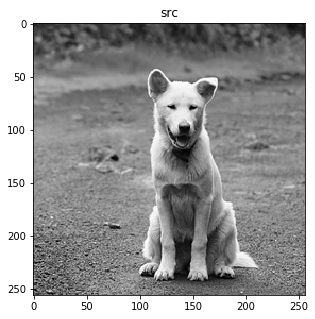

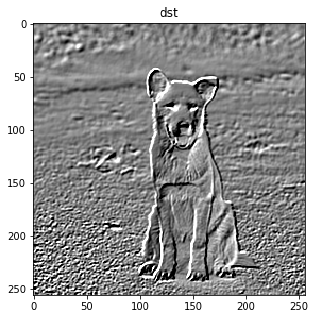

In [2]:
src = cv2.imread('img/dog.bmp', 0)

emboss = np.array([
    [-1, -1, 0],
    [-1, 0, 1],
    [0, 1, 1]], np.float32)

dst = cv2.filter2D(src, -1, emboss, delta=128)
imshow('src', src)
imshow('dst', dst)


## 샤프닝

- 블러닝의 반대
- 샤프닝은 영상을 날카롭게 만드는 처리  

| -1 | -1 | -1 |
|---|---|---|
| -1 | 9 | -1 |
|-1 | -1|-1|  

다 더했을 때 1이 나옴 -> 원래 이미지를 유지한다 .  

그래서 값을 정규화할 필요가 없다.

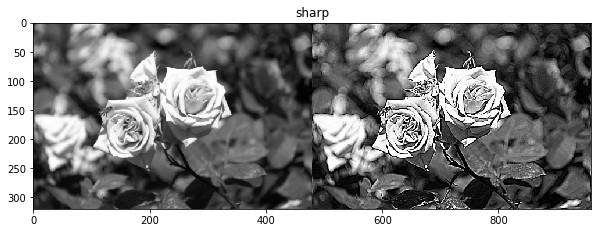

In [6]:
src = cv2.imread('img/rose.bmp', 0)

sharp = np.array([
    [-1, -1, -1],
    [-1, 9, -1],
    [-1, -1, -1]
])

dst = cv2.filter2D(src, -1, sharp)

imshow('sharp', np.hstack((src, dst)))

영상의 엣지 성분이 강해지는 것을 볼 수 있다.  



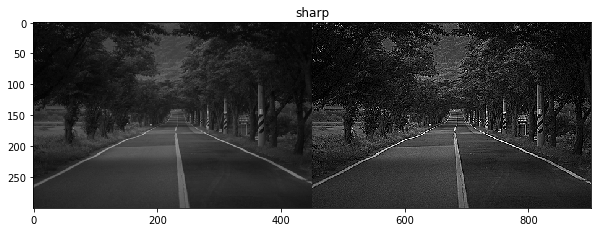

In [8]:
src = cv2.imread('img/road1.jpg', 0)

sharp = np.array([
    [0 ,-1, 0],
    [-1, 5, -1],
    [0, -1, 0]
])

dst = cv2.filter2D(src, -1, sharp)

imshow('sharp', np.hstack((src, dst)))

## 에지 검출
 
- 에지는 영상에서 화소의 밝기가 급격하게 변하는 부분
- 에지를 검출할 수 있으면 물체의 윤곽선을 알 수 있다.

사람은 배경정보도 중요하게 생각하지만 기계에서 무언가를 얻으려고 하면  
배경은 의미가 없기 떄문에 에지가 더 중요하다.  

이전부터 에지검출은 꾸준히 연구되어왔음


### 에지 검출 방법
- 1차 미분값을 이용한 방법
- 2차 미분값을 이용한 방법
- 그 밖의 방법

미분이랑 단일 시간당 변화량이다.  

기본적으로는 기울기기 때문에 단위 픽셀당   

2차미분은 미분한 것을 한번 더 미분하는 것이다.  

1차 미분을 통해 값이 급격하게 변하는 곳을 빼기(차이)를 통해 구할 수 있다. 

영상 한점에서  
크기가 얼마인지와 , 방향 벡터를 구할 수 있다.  

- Roberts
- Prewitt
- Sobel

x축 방향의 미분과 y축 방향의 미분이 있다.  
G_x 수직선, G_y 수평선  

로버츠는 대각선의 하나만 보기 때문에 노이즈에 약하다.  


프리윗과 소벨의 차이는  
옆에 있는 픽셀들에 대해서는 가중치를 크게 주고 프리윗은 수평과 대각선에 대해서 구별하지 않는다. 



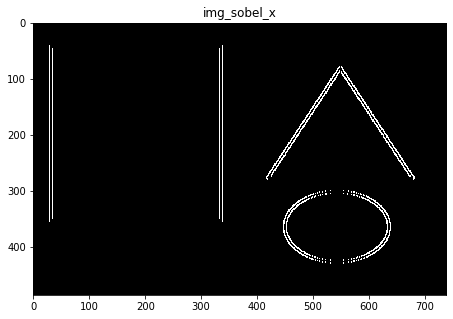

In [21]:
# Sobel
src = cv2.imread('img/box.png', 0)
img_sobel_x = cv2.Sobel(src, cv2.CV_64F, 1, 0, ksize=3)
img_sobel_x = cv2.convertScaleAbs(img_sobel_x)
imshow('img_sobel_x', img_sobel_x)

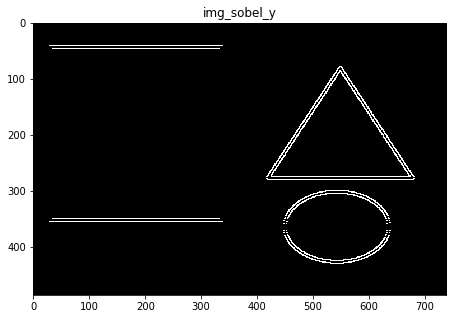

In [22]:
# Sobel
src = cv2.imread('img/box.png', 0)
img_sobel_y = cv2.Sobel(src, cv2.CV_64F, 0, 1, ksize=3)
img_sobel_y = cv2.convertScaleAbs(img_sobel_y)
imshow('img_sobel_y', img_sobel_y)

최종적으로 합쳐진 영상이다.

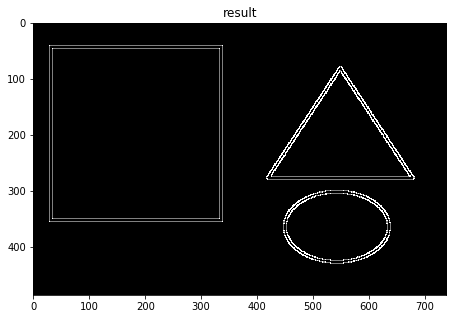

In [20]:
dst = cv2.addWeighted(img_sobel_x, 0.5, img_sobel_y, 0.5, 0.0)
imshow('result', dst)

컨볼루전은 어떤 특성이 있냐면  

소벨 가운데에 1로 합이 1이 되는 것을 어떻게 생각할 수 있냐면  

소벨 + 원본 영상이라고 생각할 수 있다.  




### 2차 미분 연산자

미분의 정의는  6ㅛ  5ㄺ  
-1 2 -1   
x-1 x x+1 에서의 1차미분  
을 빼면 나옴  

`Laplacian`  

문제점은 2차미분을 하기 때문에 노이즈에 취약하다.  
그래서 가우시안 블러를 하여 자잘한 노이즈를 죽여 진행한다.  

노이즈는 엣지로 보이면 안되는데 구별하기 어려움  



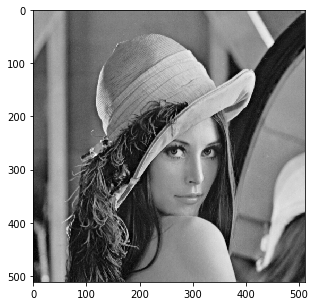

In [46]:
src = cv2.imread('img/Lenna.png', cv2.IMREAD_GRAYSCALE)
imshow("", src)
src = cv2.GaussianBlur(src, (3, 3), 0)
laplacian = cv2.Laplacian(src, cv2.CV_32F)
dst = cv2.convertScaleAbs(laplacian)
# dst = (dst > 20) * 255
# dst = dst.astype('uint8')
cv2.imshow('dst', dst)

cv2.waitKey()
cv2.destroyAllWindows()

## 케니 엣지 필터링

주로 외곽선을 잘 검출한다.  

굵은 선보다는 연결된 선으로 나오고 간단하면서 결과가 좋다.  

`cv2.Canny(img_gray, 30, 180)`  
엣지의 크기가 30보다 작으면 엣지로 보지 않고  
180보다 크다면 무조건 엣지로 본다.

1. step #1 잡음 억제  
    가우시안 블러링을 한다.    
    
2. step #2 그라디언트 계산하기  
    소벨 엣지를 사용하여 엣지의 크기를 통해 방향벡터를 계산하고  
    엣지의 방향성을 따진다.  
    세타를 구해 수평(90), 45도, 135도 0도에 대해서 구한다. 
    파란색: 수평, 빨간색: 수직, 노란,녹색: 대각선  
    
3. step #3 비최대 억제  
    엣지는 값이 크게 변하는데 이전에는 엣지값이 기준 이상이면 모두 엣지라고 했지만  
    가장 주변에서 엣지값이 최대인 것만 선택하게 된다.  
    
4. step #4 히스테리시스  
    maxval과 minval이 있는데 amx보다 클 경우 무조건 엣지로 보게되고  
    minval보다 낮으면 강한 변화량이 없기 때문에 엣지로 보지 않는다.  
    이전의 엣지 검출하는 것들은 하나의 기준으로만 분류했었음  
    max와 min 사이에 있는 것들은 엣지가 커지기도하고 작아지기도한다.  
    
    
    maxval와 max-min 사이가 연결되어있는 것들은 엣지로 본다. 하지만 maxval와 연결되어 있지 않은 것들은  
    엣지로 보지 않는다. 어떻게 연결되어있는지를 보는지는 3번에서 연결되어있는지를 보았기 때문에 가능하다.  
    minval이 낮아지게 되면 엣지라고 정할 후보가 많아지는 것이다.  
    
특정할 만한 기준이 없다면 대개 2:1, 3:1로 사용한다.  

실행결과 경계선들이 더 잘 검출되는 것을 볼 수 있다.  
notebook에서는 잘 보이지 않아 window를 띄어 보는 것이 엣지를 확인할 수 있다.  



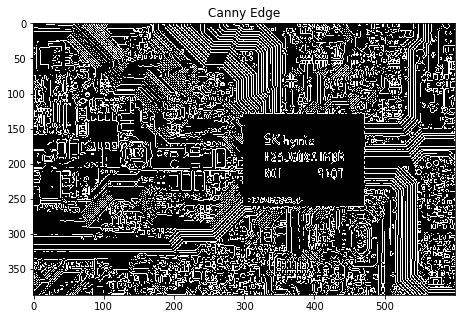

In [12]:
img_gray = cv2.imread('img/tech.jpg', cv2.IMREAD_GRAYSCALE)
img_canny = cv2.Canny(img_gray, 50, 170)
imshow("Canny Edge", img_canny)
cv2.imwrite("out.png", img_canny)

cv2.imshow('dst', np.hstack((img_gray,img_canny)))
cv2.waitKey()
cv2.destroyAllWindows()

Sobel 엣지와 비교해보자

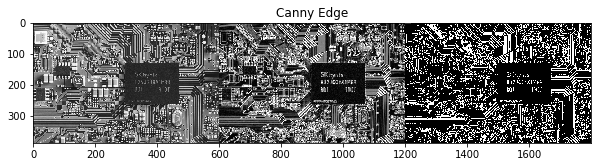

In [18]:
img_gray = cv2.imread('img/tech.jpg', cv2.IMREAD_GRAYSCALE)

img_sobel_x = cv2.Sobel(img_gray, cv2.CV_64F, 1, 0, ksize=3)
img_sobel_x = cv2.convertScaleAbs(img_sobel_x)
img_sobel_y = cv2.Sobel(img_gray, cv2.CV_64F, 0, 1, ksize=3)
img_sobel_y = cv2.convertScaleAbs(img_sobel_y)
dst = cv2.addWeighted(img_sobel_x, 0.5, img_sobel_y, 0.5, 0.0)


img_canny = cv2.Canny(img_gray, 50, 170)
stack_img = np.hstack((img_gray, dst))
imshow("Canny Edge", np.hstack((stack_img,img_canny)))
cv2.imwrite("out.png", img_canny)

cv2.imshow('img_gray', img_gray)
cv2.imshow('dst', dst)
cv2.imshow('img_canny', img_canny)
cv2.waitKey()
cv2.destroyAllWindows()

# 노이즈
---  

`cv2.randn(noise, 0, stddev)`를 사용하여 노이즈를 생성하여 영상에 add해준다.

가우시안 블러링을 했을 때 얼마나 노이즈가 감소되는지를 보자.

In [1]:
src = cv2.imread('img/box.png', cv2.IMREAD_GRAYSCALE)
cv2.imshow('src', src)

for stddev in [10, 20 ,30]: 
    noise = np.zeros(src.shape, np.int32)
    cv2.randn(noise, 0, stddev)
    
    dst = cv2.add(src, noise, dtype=cv2.CV_8UC1)
    desc = 'stddev = %d' % stddev
    cv2.putText(dst, desc, (10, 30), cv2.FONT_HERSHEY_SIMPLEX,
               1.0, 255, 1, cv2.LINE_AA)
    cv2.imshow('dst', dst)
    cv2.waitKey()
    
    

NameError: name 'cv2' is not defined

# 중간값 필터링

화소값들의 가중합으로 계산할 수 없는 공간필터인 비선형 공간 필터중 하나이다.  

필터의 픽셀들을 sorting 해서 중간값을 취함.  

영상의 잡음 제거를 할 때 사용된다.  
이점은 가우시안 필터링에 비해 노이즈에 대해 영향이 적다.  



In [30]:
import random
src = cv2.imread('img/Lenna.png', cv2.IMREAD_GRAYSCALE)

for i in range(0, int(src.size / 10)):
    x = random.randint(0, src.shape[1] - 1)
    y = random.randint(0, src.shape[0] - 1)
    src[y, x] = (i % 2) * 255

dst1 = cv2.GaussianBlur(src, (31, 31), 1)
dst2 = cv2.medianBlur(src, 3)

cv2.imshow('src', src)
cv2.imshow('dst1', dst1)
cv2.imshow('dst2', dst2)

cv2.waitKey()
cv2.destroyAllWindows()

In [34]:
import random
src = cv2.imread('img/box.png', cv2.IMREAD_GRAYSCALE)

for i in range(0, int(src.size / 10)):
    x = random.randint(0, src.shape[1] - 1)
    y = random.randint(0, src.shape[0] - 1)
    src[y, x] = (i % 2) * 255

dst1 = cv2.GaussianBlur(src, (31, 31), 1)
dst2 = cv2.medianBlur(src, 3)

ret, mask = cv2.threshold(dst2, 100, 255, cv2.THRESH_BINARY)
cv2.imshow('src', src)
cv2.imshow('dst1', dst1)
cv2.imshow('dst2', dst2)

cv2.waitKey()
cv2.destroyAllWindows()

In [ ]:
%%writefile server.py

from flask import Flask, request
import cv2
import numpy as np
import time

app = Flask(__name__)


def chromakey_background(img, background):
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    patch = hsv[0:20, 0:20, :]

    # 범위를 조금 넓힌다.
    minH = np.min(patch[:, :, 0]) * 0.9  # 90%
    maxH = np.max(patch[:, :, 0]) * 1.1  # 110%

    minS = np.min(patch[:, :, 1]) * 0.9
    maxS = np.max(patch[:, :, 1]) * 1.1

    h = hsv[:, :, 0]
    s = hsv[:, :, 1]
    dest1 = img.copy()
    for r in range(img.shape[0]):
        for c in range(img.shape[1]):
            if h[r,c] >=minH and h[r,c] <=maxH and \
                s[r,c] >minS and s[r,c] <=maxS:
                dest1[r, c, :] = background[r, c, :]
            else:
                dest1[r, c, :] = img[r, c, :]
    return dest1


@app.route('/')
def index():
    return render_template("image")


@app.route('/upload', methods=["post"])
def upload():
    f = request.files["file1"]
    filename = "./static/" + f.filename
    f.save(filename)

    f1 = request.files["file2"]
    filename1 = "./static/" + f1.filename
    f1.save(filename1)

    img = cv2.imread(filename)
    img = cv2.resize(img, dsize=(320, 240))

    background = cv2.imread(filename1)
    background = cv2.resize(background, dsize=(320, 240))

    img = chromakey_background(img, background)
    cv2.imwrite(filename, img)

    now = time.localtime()
    return "<img src=/static/" + f.filename + "?" + str(now.tm_sec) + ">"


if __name__ == '__main__':
    app.run(host='0.0.0.0', debug=True, port=8000)